# An√°lise de Times de CS2: FaZe, NaVi, Vitality

Este notebook analisa estat√≠sticas dos tr√™s principais times de CS2 usando dados de desempenho de partidas.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados (certifique-se de que o arquivo esteja na mesma pasta do notebook)
df = pd.read_csv("cs2_database.csv")
df['data'] = pd.to_datetime(df['data'], dayfirst=True)
df.head()

time       data   adversario  vitoria  melhor_de  media_kd_time  \
0  FaZe 2024-01-24  GamerLegion        0          3           -2.0   
1  FaZe 2024-01-25       Spirit        1          3            9.2   
2  FaZe 2024-01-26  GamerLegion        1          3            5.2   
3  FaZe 2024-01-27       Liquid        1          3            2.8   
4  FaZe 2024-02-03       Rebels        1          3            6.2   

   media_rating_2.1_time  media_ADR_time  total_rounds_eco  \
0                  0.950           63.56                 5   
1                  1.442           84.30                 3   
2                  1.120           73.88                 5   
3                  1.082           76.52                 7   
4                  1.256           79.08                 4   

   total_rounds_semibuy  total_rounds_full_buy  rounds_ganhos  \
0                     9                     29             24   
1                     2                     27             26   
2                     9                     41             38   
3                     4                     32             26   
4                     4                     29             26   

   rounds_perdidos  razao_rounds_ganhos_perdidos  
0               29                      0.827586  
1                8                      3.250000  
2               26                      1.461538  
3               20                      1.300000  
4               16                      1.625000

In [64]:
def analisar_time(df, nome_time):
    time_df = df[df['time'] == nome_time]

    print(f'Gr√°ficos de desempenho - {nome_time}')

    # Gr√°fico 1: Evolu√ß√£o do Rating 2.1
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=time_df, x='data', y='media_rating_2.1_time', marker='o')
    plt.title(f'Evolu√ß√£o do Rating 2.1 - {nome_time}')
    plt.xlabel('Data')
    plt.ylabel('Rating 2.1')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Gr√°fico 2: Distribui√ß√£o dos tipos de compra
    compras = ['total_rounds_eco', 'total_rounds_semibuy', 'total_rounds_full_buy']
    compras_totais = time_df[compras].sum()
    compras_totais.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title=f'Distribui√ß√£o dos Tipos de Compra - {nome_time}')
    plt.ylabel('')
    plt.show()

    # Gr√°fico 3: M√©dia KD por advers√°rio
    plt.figure(figsize=(10, 4))
    sns.barplot(data=time_df, x='adversario', y='media_kd_time')
    plt.title(f'M√©dia KD por Advers√°rio - {nome_time}')
    plt.xlabel('Advers√°rio')
    plt.ylabel('M√©dia KD')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Gr√°fico 4: Propor√ß√£o de Vit√≥rias
    vit_counts = time_df['vitoria'].value_counts()
    vit_counts.index = ['Vit√≥rias', 'Derrotas',]
    vit_counts.plot(kind='bar', color=['green', 'red'], title=f'Vit√≥rias vs Derrotas - {nome_time}')
    plt.ylabel('N√∫mero de Partidas')
    plt.show()

    # Gr√°fico 5: Raz√£o de Rounds Ganhos/Perdidos
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=time_df, x='data', y='razao_rounds_ganhos_perdidos', marker='o')
    plt.title(f'Raz√£o de Rounds Ganhos/Perdidos - {nome_time}')
    plt.xlabel('Data')
    plt.ylabel('Raz√£o')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Gr√°ficos de desempenho - FaZe


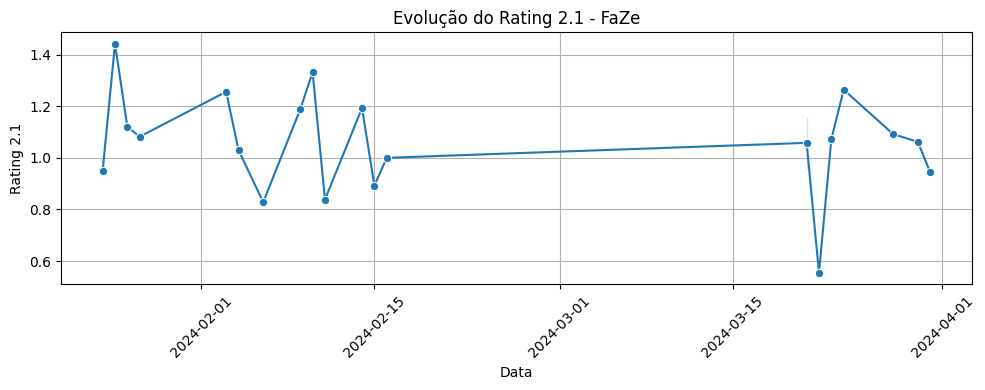

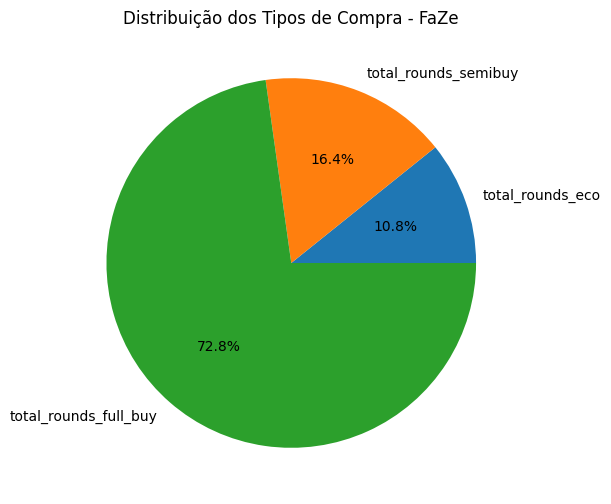

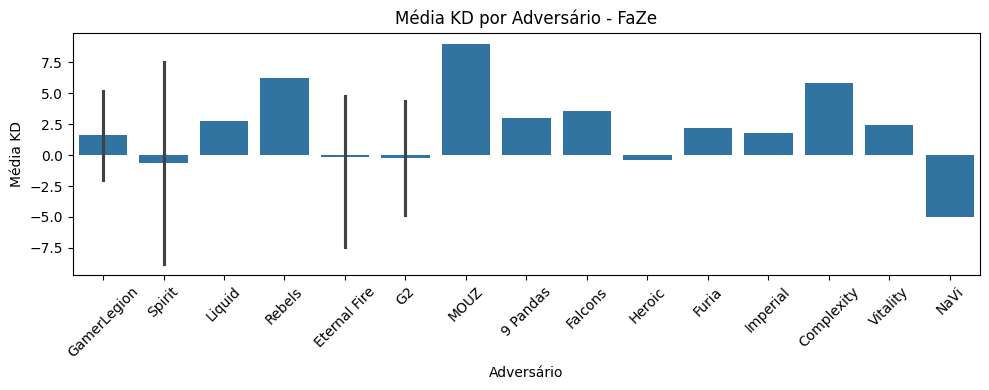

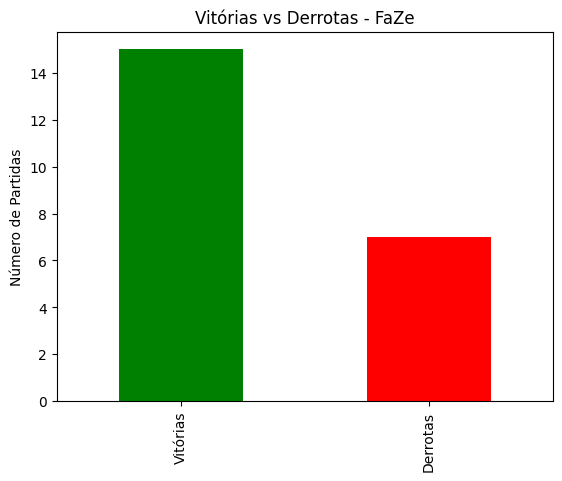

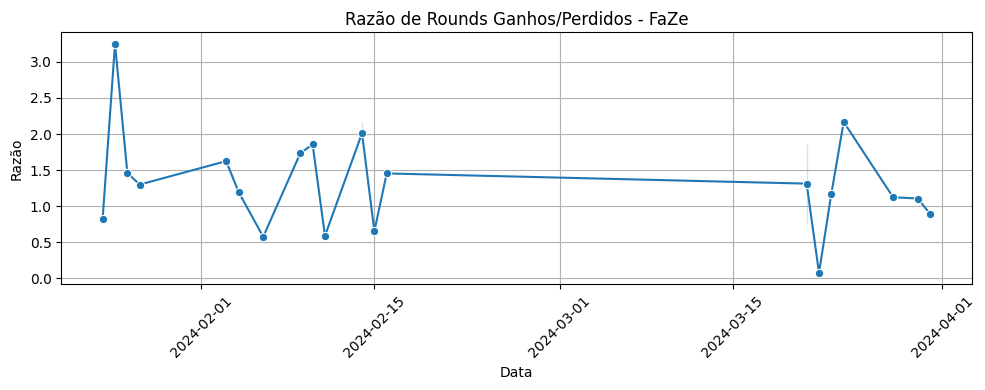

Gr√°ficos de desempenho - NaVi


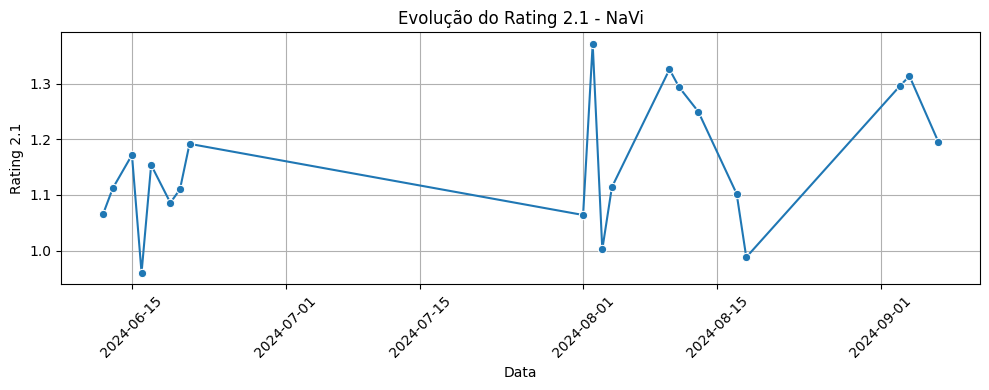

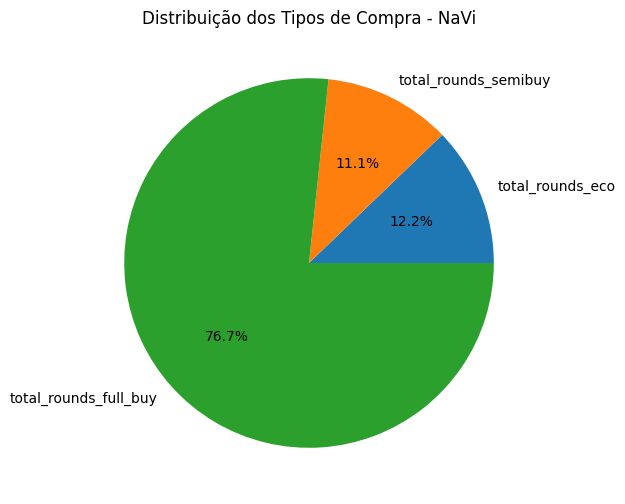

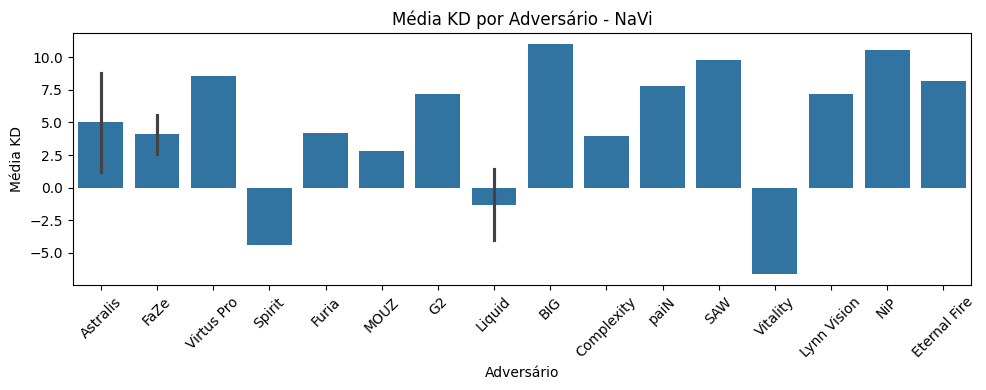

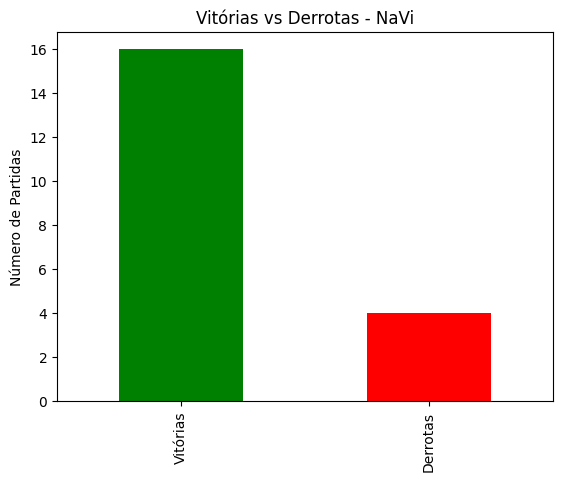

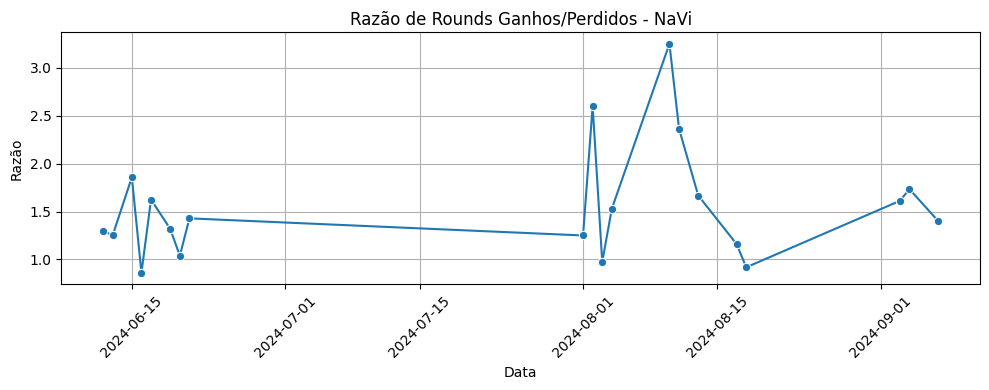

Gr√°ficos de desempenho - Vitality


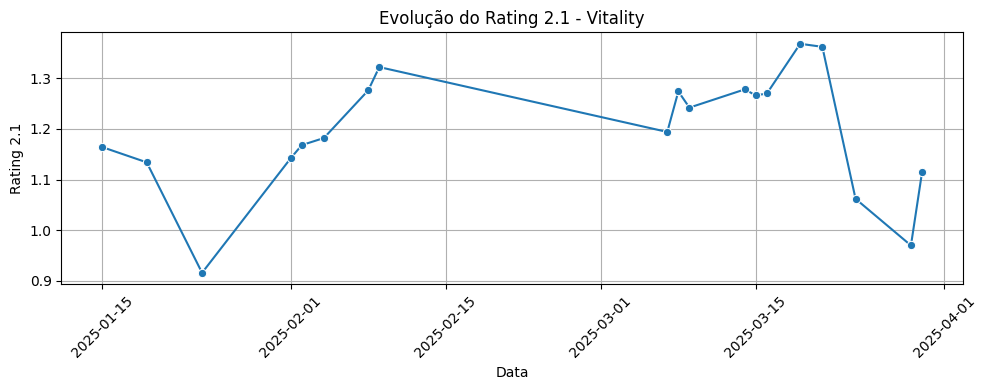

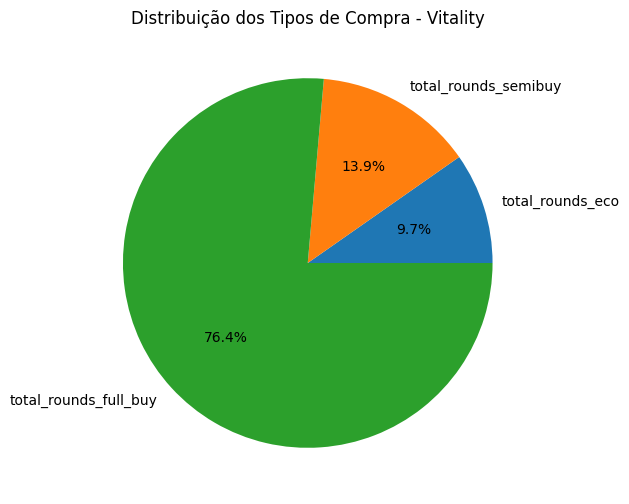

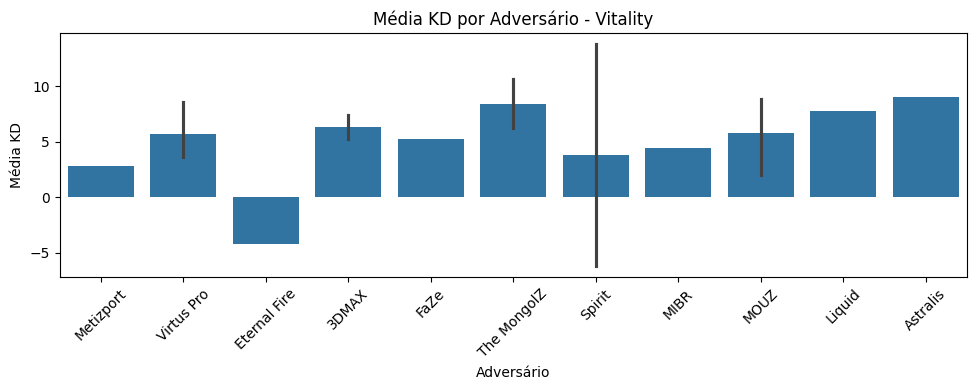

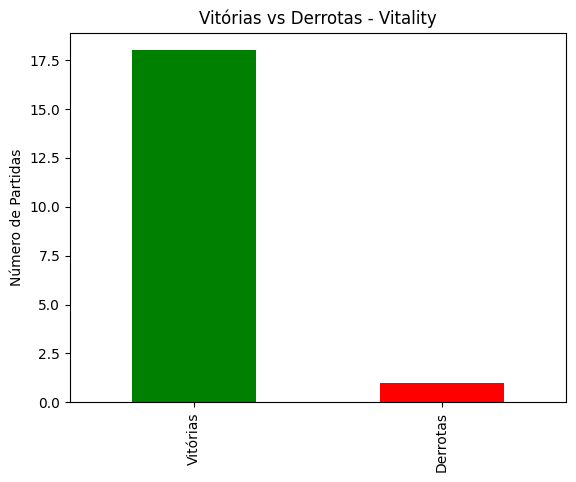

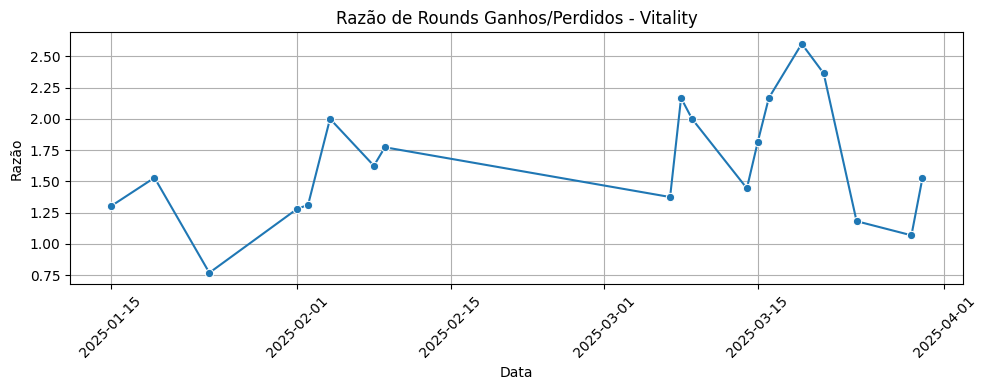

In [65]:
times_para_analisar = ['FaZe', 'NaVi', 'Vitality']
for time in times_para_analisar:
    analisar_time(df, time)

# CORRELA√á√ÉO

05 - H√° rela√ß√£o entre a m√©dia de rounds jogados em semibuy e a raz√£o de rounds ganhos?

> Vari√°veis: qtde rounds semibuy, raz√£o rounds ganhos.

> Objetivo: Avaliar se estrat√©gias intermedi√°rias de compra afetam positivamente o desempenho.

In [69]:
def analisar_relacao_semibuy_razao(df, nome_time):
    time_df = df[df['time'] == nome_time]

    # Calcular correla√ß√£o
    correlacao = time_df[['media_rounds_semibuy', 'razao_rounds_ganhos_perdidos']].corr().iloc[0, 1]
    print(f'Correla√ß√£o entre semibuy e raz√£o de rounds para {nome_time}: {correlacao:.2f}')

    df['total_rounds'] = df['total_rounds_eco'] + df['total_rounds_full_buy'] + df['total_rounds_semibuy']
    df['rounds_ganhos_semibuy'] = (df['total_rounds_semibuy'] / df['total_rounds']) * df['rounds_ganhos']
    df['media_rounds_semibuy'] = df['rounds_ganhos_semibuy'].sum() / df['rounds_ganhos']

    # Gr√°fico de dispers√£o
    plt.figure(figsize=(10, 6))
    sns.regplot(
        data=time_df,
        x='media_rounds_semibuy',
        y='razao_rounds_ganhos_perdidos',
        scatter_kws={"color": "blue"},
        line_kws={"color": "red"}
    )
    plt.title(f'Rela√ß√£o entre M√©dia de Rounds Semibuy e Raz√£o de Rounds Ganhos - {nome_time}')
    plt.xlabel('M√©dia de Rounds Semibuy')
    plt.ylabel('Raz√£o de Rounds Ganhos/Perdidos')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Correla√ß√£o entre semibuy e raz√£o de rounds para FaZe: -0.41


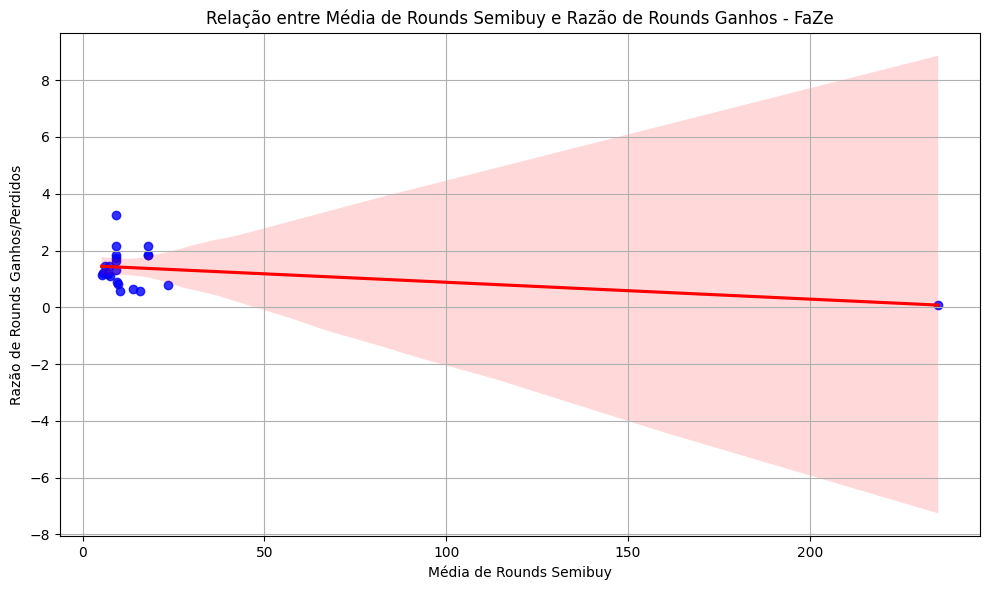

Correla√ß√£o entre semibuy e raz√£o de rounds para NaVi: 0.57


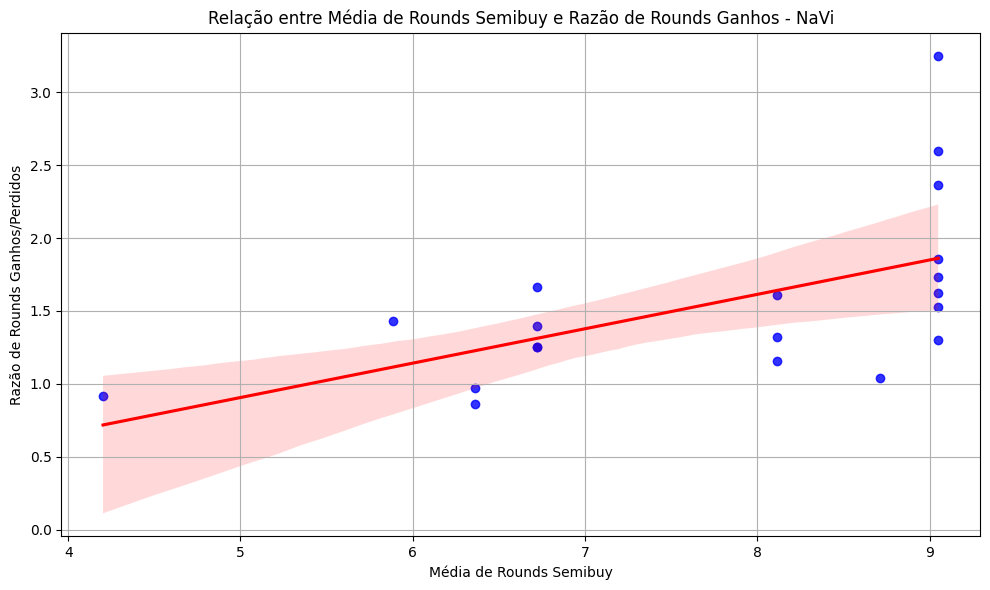

Correla√ß√£o entre semibuy e raz√£o de rounds para Vitality: -0.07


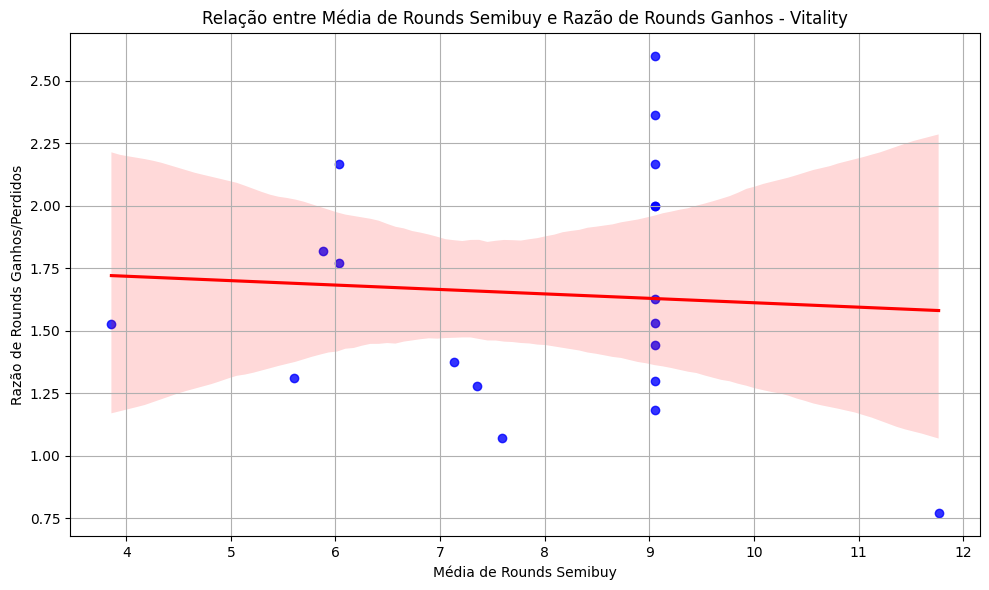

In [70]:
times_para_analisar = ['FaZe', 'NaVi', 'Vitality']
for time in times_para_analisar:
    analisar_relacao_semibuy_razao(df, time)


# DISTRIBUI√á√ÉO DE BERNOULLI

06 - Qual a probabilidade de um time vencer um round quando est√° em full buy vs. eco?

> Vari√°veis: rounds full buy, rounds eco, rounds ganhos.

> Objetivo: Modelar a chance de sucesso por tipo de compra (tratando cada round como um ensaio de Bernoulli).

In [ ]:
def calcular_probabilidades_por_compra(df, nome_time):
    time_df = df[df['time'] == nome_time]

    df['total_rounds'] = df['total_rounds_eco'] + df['total_rounds_full_buy'] + df['total_rounds_semibuy']
    df['rounds_ganhos_eco'] = (df['total_rounds_eco'] / df['total_rounds']) * df['rounds_ganhos']
    df['rounds_ganhos_full_buy'] = (df['total_rounds_full_buy'] / df['total_rounds']) * df['rounds_ganhos']

    # Somar todos os rounds ganhos e totais por tipo de compra
    total_eco = time_df['total_rounds_eco'].sum()
    ganhos_eco = time_df['rounds_ganhos_eco'].sum()

    total_full = time_df['total_rounds_full_buy'].sum()
    ganhos_full = time_df['rounds_ganhos_full_buy'].sum()

    # Calcular probabilidades
    prob_eco = ganhos_eco / total_eco if total_eco > 0 else 0
    prob_full = ganhos_full / total_full if total_full > 0 else 0

    print(f"\nüèÜ {nome_time} - Probabilidades de vit√≥ria por tipo de compra:")
    print(f"üîπ ECO: {prob_eco:.2%} ({ganhos_eco} / {total_eco})")
    print(f"üîπ FULL BUY: {prob_full:.2%} ({ganhos_full} / {total_full})")

    # Gr√°fico
    plt.figure(figsize=(8, 6))
    plt.bar(['ECO', 'FULL BUY'], [prob_eco, prob_full], color=['gray', 'green'])
    plt.ylim(0, 1)
    plt.ylabel('Probabilidade de Vit√≥ria')
    plt.title(f'Probabilidade de Vit√≥ria por Tipo de Compra - {nome_time}')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()



üèÜ FaZe - Probabilidades de vit√≥ria por tipo de compra:
üîπ ECO: 61.31% (55.79600717036167 / 91)
üîπ FULL BUY: 63.82% (392.4858062796203 / 615)


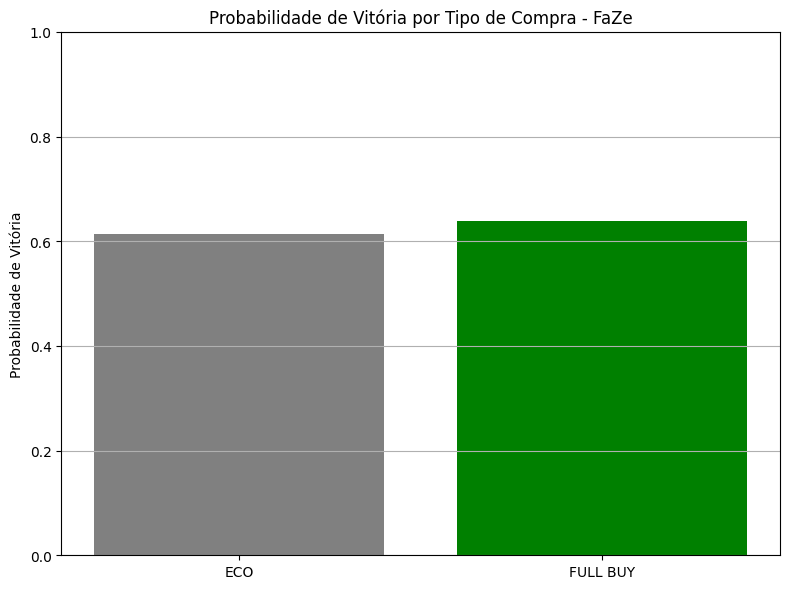


üèÜ NaVi - Probabilidades de vit√≥ria por tipo de compra:
üîπ ECO: 67.18% (76.58798694794444 / 114)
üîπ FULL BUY: 67.76% (485.8112345626502 / 717)


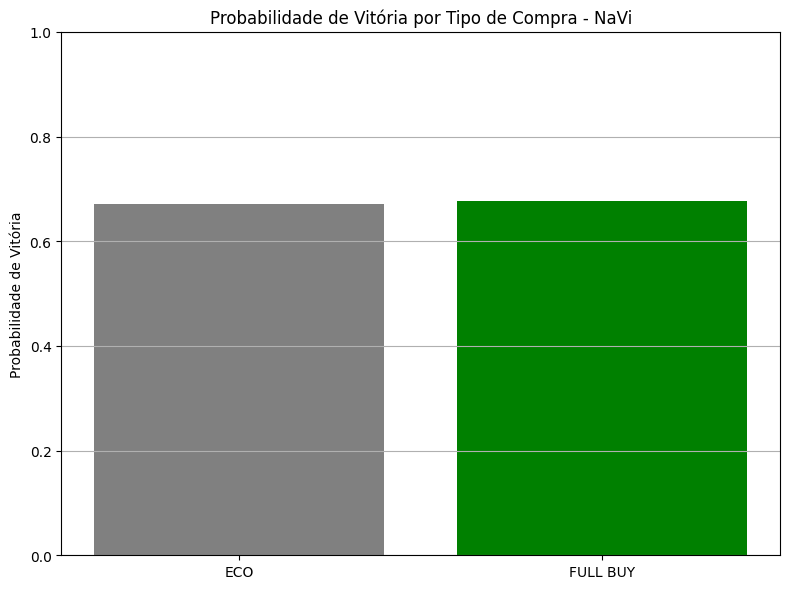


üèÜ Vitality - Probabilidades de vit√≥ria por tipo de compra:
üîπ ECO: 68.49% (57.528901971281364 / 84)
üîπ FULL BUY: 69.31% (457.47108617488635 / 660)


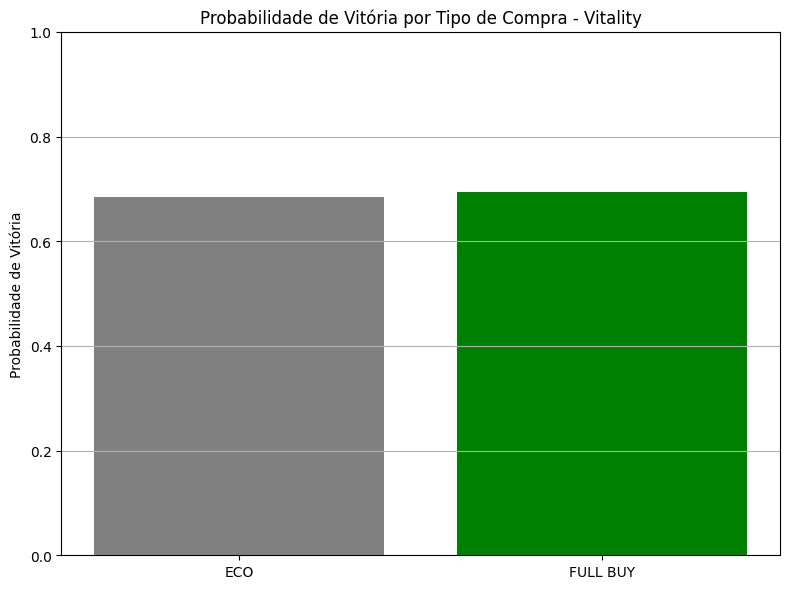

In [68]:
for time in ['FaZe', 'NaVi', 'Vitality']:
    calcular_probabilidades_por_compra(df, time)
